In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io as sio

In [2]:
def gaussfn(x,mu,C):
    return np.zeros(x.shape[1])

In [7]:
data = sio.loadmat('mnist.mat')
X = data['trainX'].astype(float)/255
y = data['trainY'][0,:]
idx = np.less(y,3)
X = X[idx,:]
y = y[idx]
X = X[:1000,:]
y = y[:1000]


u,s,v = np.linalg.svd(X,0)
print(u.shape,s.shape,v.shape)
X = u[:,:2]

m,n = X.shape

(1000, 784) (784,) (784, 784)


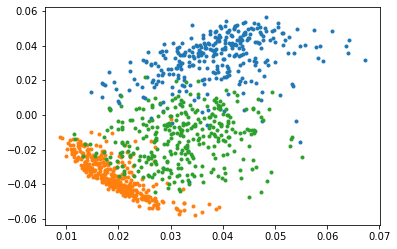

In [ ]:
def plot_label(y):
    for i in range(len(np.unique(y))):
        plt.plot(X[np.equal(y,i),0],X[np.equal(y,i),1],marker='.',linewidth=0)
def plot_gauss(alpha,mu,Clist):  
    xg=np.linspace(0,.05,100)
    yg=np.linspace(-.05,.05,100)
    [xm,ym] = np.meshgrid(xg,yg)
    zm = [xm*0 for k in range(K)]
    for i in range(len(xg)):
        for j in range(len(xg)):
            xxg = np.array([xm[i,j],ym[i,j]])
            for k in range(K):
                zm[k][i,j] = alpha[k]*gaussfn(xxg,mu[:,k],Clist[k])
    for k in range(K):
        #plt.subplot(2,3,k+1)
        plt.contour(xm,ym,zm[k],alpha=.5)
        
plot_label(y)       

In [9]:


def get_pi(pi,alpha, mu, Clist):
    return pi

def get_alpha(pi,alpha, mu, Clist):
    return alpha
def get_mu(pi,alpha, mu, Clist):
    return mu

def get_Clist(pi,alpha, mu, Clist):
    
    return Clist  
        
K = 5
mu = np.random.rand(n,K)
pi = np.zeros((m,K))
alpha = np.ones(K)/K
Clist = [np.eye(n) for k in range(K)]





for iter in range(10):
    pi = get_pi(pi,alpha, mu, Clist)
    alpha = get_alpha(pi,alpha, mu, Clist)
    mu = get_mu(pi,alpha, mu, Clist)
    Clist = get_Clist(pi,alpha, mu, Clist)
  
        
        


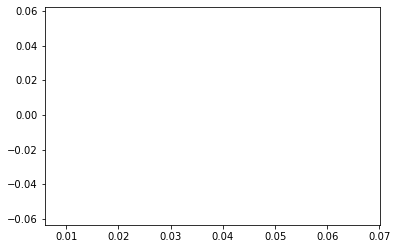

In [11]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
yhat = np.argmax(pi,axis=1)

for j in range(m):
    k = yhat[j]
    plt.plot(X[j,0],X[j,1],marker='.',linewidth=0,color=colors[k],markersize=pi[j,k]*2)
    
